<a href="https://colab.research.google.com/github/BLOOSALMON/My_Real_Projrct/blob/main/%EC%A3%BC%EC%8B%9D%EC%8B%9C%EA%B3%84%EC%97%B41.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 단순이동 평균 : 최근 n 일 주식 평균. rolling 메서드는 현재 열에 대하여 일정 크기의 창(window)를 이용하여
                    # 그 window안의 값을 추가 메서드를 통해 계산하는 메서드 입니다.
# rolling.mean(), window=7 n개 합
# ewm 은 지수가중함수 입니다. 지수가중함수는 오래된 데이터에 지수감쇠를 적용하여 최근 데이터가 더 큰 영향을 끼지도록 가중치를 주는 함수입니다.
# 보통 추가 메서드로 mean() 을 사용해서 지수가중평균으로 사용합니다.
# span : 계산 기간으로 평활계수를 계산합니다. [ a = 2/(span+1) ]
# adjust : 상대적 가중치의 불균형을 해소하기위해 조정계수로 나눌지의 여부입니다. 대체로
#  값이 많을수록 adjust를 하는것이 유리합니다.

# 지수 평활법
🔁 예시로 이해하기
python
복사
편집
data = [10, 20, 30, 40, 50, 60, 70]
n_steps = 3
그리고 i = 5일 때:

python
복사
편집
data[i - n_steps : i] → data[2:5] → [30, 40, 50]
이렇게 data에서 [30, 40, 50]이라는 연속된 구간을 잘라서 하나의 입력 샘플로 만든 뒤 X에 추가하는 것입니다.



🧠 왜 이렇게 하냐면?
이 방식은 시계열 데이터에서 입력-출력 학습 데이터를 만드는 데 자주 사용됩니다.

예: 지난 3일간의 주가로 오늘의 주가를 예측하고 싶다면

X에는 [30, 40, 50] 같은 과거 3일의 데이터가 들어가고,

y에는 data[i]인 60이 들어가게 됩니다.

필요하다면, X.append(...)와 함께 y.append(data[i])도 같이 쓰여 있을 가능성이 높아요.

In [ ]:
이 함수는 다변량 시계열 데이터를 LSTM,
GRU 같은 딥러닝 모델에 넣기 위한 **입력 시퀀스 (X)**와 **예측 타깃 값 (y)**을 생성합니다.

# Create sequences including SMA
def create_sequences_multivariate(data, n_steps):
    X, y = [], []
    for i in range(n_steps, len(data)):
        X.append(data[i-n_steps:i])
        y.append(data[i, 0])  # Predict Close
    return np.array(X), np.array(y)


In [ ]:
계절성(Seasonality) : 해마다 어떤 특정한 계절 혹은 달, 주마다 특정 요일, 매일의 특정 시간에 나타나는 것 같은 계절성 요인이 시계열에 영향을 줄 때 계절성 패턴이 나타난다. 계절성은 빈도의 형태로 나타나는데, 항상 일정한 빈도이다.
 예를 들어, 여름 아이스크림 판매량 증가, 여름철 한강 이용객 수 증가, 출퇴근 시간 지하철 이용객수 등

In [ ]:
3. "q" (MA: 이동 평균)

"q"는 이동평균 모델의 이동평균 차수(MA 차수)를 나타냅니다.
이동평균은 현재 시점의 데이터가 과거 시점의 랜덤한 오차 항에 의해 영향을 받는 경우를 나타냅니다. "q"는 몇 개의 이전 시점의 오차 항을 고려할 것인지를 결정합니다.
시계열 데이터 분석에서 "p", "d", "q"는 ARIMA(자동 회귀 이동 평균) 모델의 파라미터를 나타냅니다.

ARIMA 모델은 시계열 데이터의 예측과 분석을 위해 사용되는 통계 모델 중 하나로, 시계열 데이터의 자기회귀(AR), 미분(I), 이동평균(MA) 요소를 조합하여 모델을 구성합니다.

1. "p" (AR: 자동 회귀)

"p"는 자동 회귀 모델의 자기회귀 차수(AR 차수)를 나타냅니다.
자기회귀란 현재 시점의 데이터가 이전 시점의 데이터와 관련이 있는 경우를 의미합니다. "p"는 몇 개의 이전 시점 데이터를 사용할 것인지를 결정합니다. 예를 들어, "p=1"은 바로 직전 시점의 데이터만 사용하는 자기회귀 모델을 의미하고, "p=2"는 두 시점 이전까지의 데이터를 사용하는 자기회귀 모델을 나타냅니다.
"d"는 미분 차수를 나타냅니다.
미분은 시계열 데이터의 추세를 제거하기 위해 데이터 간의 차이를 계산하는 과정을 나타냅니다. "d"는 몇 번의 차이를 적용할 것인지를 결정합니다. 일반적으로, 시계열 데이터가 안정적인 상태에 도달할 때까지 미분을 적용합니다.
	비계절 차분 차수 (시계열이 정상성이 아닐 경우 1차 차분 적용)

In [ ]:
#| 인자                       | 설명                                             |
| ------------------------ | ---------------------------------------------- |
| `series`                 | 시계열 데이터 (예: `df['Close']`)                     |
| `seasonal=True`          | 계절성(Seasonality)이 있다고 가정                       |
| `m=5`                    | 계절성 주기 (예: 주 5일 영업이면 `5`, 주간이면 `7`, 월간이면 `12`) |
| `start_p`, `max_p`       | ARIMA의 `p` (자기회귀-과거 자기에게 영향 받음 차수) 시작값과 최대값                  |
| `start_q`, `max_q`       | ARIMA의 `q` (이동 평균 차수) 시작값과 최대값 (과거 잔차 반영)                 |
| `d=1`                    | 비계절 차분 차수 (시계열이 정상성이 아닐 경우 1차 차분 적용)           |
| `start_P`, `max_P`       | 계절 AR 차수의 시작과 최대값 # 계절 주김나큼 반영                              |
| `start_Q`, `max_Q`       | 계절 MA 차수의 시작과 최대값                              |
| `D=1`                    | 계절 차분 차수(계절성 제거)                                      |
| `trace=True`             | 모델 탐색 과정을 콘솔에 출력해 줌 (진행 로그 보기)                 |
| `error_action='ignore'`  | 오류가 발생한 모델은 무시                                 |
| `suppress_warnings=True` | 경고 메시지 숨김                                      |
| `stepwise=True`          | **stepwise 방식**으로 효율적으로 모델 탐색 (속도 빠름)          |


In [ ]:
이동평균 계수(θ) 를 기반으로 시계열의 **오차항(ε)**을 유일하게 추정할 수 있다는 조건입니다. 즉, 이동평균 모델이 정상적으로 작동하려면, 모델이 실제 오차항을 추정할 수 있어야 하고, 그 추정이 유일해야 합니다.

맞습니다. SARIMAX와 같은 시계열 모델에서 **역추적 가능성(invertibility)**은 모델이 자동으로 처리하는 하이퍼파라미터로, 사용자가 직접 지정하지 않아도 됩니다. 이 개념은 모델이 자기 회귀(AR) 또는 이동평균(MA) 모델을 적합시킬 때 내부적으로 고려되며, 보통 사용자가 설정할 필요는 없습니다. 대신, 모델의 설정(특히 enforce_stationarity나 enforce_invertibility와 같은 옵션)을 통해 역추적 가능성을 강제하거나 완화할 수 있습니다.

In [ ]:
sarima_result: SARIMAX 모델을 적합시킨 후 얻어진 결과 객체입니다. 이 객체는 모델에 대한 정보, 예측 결과, 잔차 분석 등 다양한 정보를 포함합니다.

get_forecast(steps=forecast_steps): 이 메서드는 steps 인자를 통해 지정된 미래의 시간 단계에 대한 예측 값을 생성합니다.

steps=forecast_steps: forecast_steps는 예측할 미래 기간을 나타내는 정수입니다. 예를 들어, steps=12로 설정하면 12단계(12개월, 12일 등)의 예측을 수행하게 됩니다.

In [ ]:
**forecast_mean**은 미래의 예측된 평균값입니다.

**conf_int**는 예측값에 대한 신뢰 구간을 제공합니다. 이를 통해 예측 값이 어느 범위 내에 있을 가능성이 높은지 알 수 있습니다.

이 두 가지는 시계열 예측의 불확실성을 평가하는 데 중요한 역할을 합니다.

In [ ]:
sarima_result: SARIMAX 모델을 적합시킨 후 얻어진 결과 객체입니다. 이 객체는 모델에 대한 정보, 예측 결과, 잔차 분석 등 다양한 정보를 포함합니다.

get_forecast(steps=forecast_steps): 이 메서드는 steps 인자를 통해 지정된 미래의 시간 단계에 대한 예측 값을 생성합니다.

steps=forecast_steps: forecast_steps는 예측할 미래 기간을 나타내는 정수입니다. 예를 들어, steps=12로 설정하면 12단계(12개월, 12일 등)의 예측을 수행하게 됩니다.

In [ ]:
last_date = series.index[-1]

series.index[-1]는 시계열 데이터(series)의 마지막 날짜를 얻습니다. 예를 들어, 시계열 데이터가 2020-01-01부터 시작해서 2020-04-10까지 있다면, last_date는 2020-04-10이 됩니다.

series.index는 시계열의 인덱스를 나타내며, 일반적으로 날짜 형식입니다.

forecast_index = pd.date_range(last_date + pd.Timedelta(days=1), periods=forecast_steps)

pd.date_range()는 지정된 날짜 범위 내에서 날짜 시퀀스를 생성하는 함수입니다. 여기에 두 가지 인자를 사용하고 있습니다:

last_date + pd.Timedelta(days=1): last_date에서 하루를 더한 날짜입니다. 예를 들어, last_date가 2020-04-10이라면, last_date + pd.Timedelta(days=1)은 2020-04-11이 됩니다.

periods=forecast_steps: 예측할 기간의 길이를 설정하는 인자입니다. 예를 들어, forecast_steps=12라면, forecast_index는 last_date + 1일부터 시작하여 12일간의 날짜 범위를 생성합니다.

이 코드의 결과는 last_date 이후의 날짜를 포함하는 예측 기간을 나타내는 날짜 인덱스입니다.

In [ ]:
forecast_index = pd.date_range(series.index[-1] + pd.Timedelta(days=1), periods=forecast_steps)

forecast_index는 예측 날짜를 생성합니다. series.index[-1]는 시계열 데이터의 마지막 날짜입니다. 여기에 하루를 더한 후, forecast_steps만큼의 날짜 범위를 생성하여 예측 날짜 인덱스를 만듭니다.

plt.figure(figsize=(14,6))

그래프의 크기를 설정합니다. figsize=(14,6)은 그래프의 가로 크기를 14, 세로 크기를 6으로 설정하는 것입니다.

plt.plot(series.index, series, label='Historical Data', color='blue')

series.index와 series는 시계열 데이터의 날짜 인덱스와 해당 값입니다. 이를 파란색 선으로 시각화하여 기존의 실제 시계열 데이터를 표시합니다.

label='Historical Data'는 범례에 "Historical Data"라는 라벨을 추가합니다.

plt.plot(forecast_index, forecast_mean, label='SARIMA Forecast', color='green')

forecast_index와 forecast_mean은 예측된 날짜와 예측된 값을 나타냅니다. 이 데이터를 초록색 선으로 시각화하여 예측된 값을 표시합니다.

label='SARIMA Forecast'는 범례에 "SARIMA Forecast"라는 라벨을 추가합니다.

plt.fill_between(forecast_index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='lightgreen', alpha=0.4, label='Confidence Interval')

fill_between은 신뢰 구간을 표시하는 함수입니다. conf_int는 예측된 값에 대한 하한과 상한을 제공하는 데이터프레임입니다.

conf_int.iloc[:, 0]은 하한을, conf_int.iloc[:, 1]은 상한을 나타냅니다.

alpha=0.4는 신뢰 구간의 투명도를 설정하여, 연한 초록색으로 신뢰 구간을 시각화합니다.

plt.title('SARIMA Forecast - Next 30 Days')

그래프의 제목을 설정합니다. 예시에서는 "SARIMA Forecast - Next 30 Days"라는 제목을 사용하고 있습니다.

plt.xlabel('Date')

x축의 레이블을 "Date"로 설정합니다.

plt.ylabel('Closing Price')

y축의 레이블을 "Closing Price"로 설정합니다. 예시에서는 시계열 데이터가 주식의 종가를 나타낸다고 가정한 경우입니다.

plt.legend()

그래프의 범례를 표시하여, 각 선이나 영역이 무엇을 나타내는지 설명합니다.

plt.grid(True)

그래프에 격자선을 추가하여 가독성을 높입니다.

plt.tight_layout()

그래프의 레이아웃을 자동으로 조정하여 요소들이 겹치지 않도록 합니다.

plt.show()

최종적으로 그래프를 화면에 표시합니다.

In [ ]:
원본 데이터는 시장에서 실제로 일어나는 변동을 보여주며, **이동 평균선(SMA)**은 그 변동을 부드럽게 해주고, 장기적인 추세를 더 잘 파악할 수 있게 도와줍니다.

각 이동 평균선은 서로 다른 기간의 시장 추세를 반영하며, 이를 비교함으로써 투자자들은 매수/매도 시점을 더 잘 결정할 수 있습니다.

In [ ]:
!pip uninstall -y numpy
!pip install numpy==1.23.5
!pip install pmdarima==2.0.4


Found existing installation: numpy 2.0.2
Uninstalling numpy-2.0.2:
  Successfully uninstalled numpy-2.0.2
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 102.1 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jaxlib 0.5.1 requires numpy>=1.25, but you have numpy 1.23.5 which is incompatible.
jax 0.5.2 requires numpy>=1.25, but you have numpy 1.23.5 which is incompatible.
xarray 2025.3.1 requires numpy>=1.24, but you have numpy 1.23.5 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 1.23.5 which is incompatible.
bigframes 2.4.0 requires numpy>=1.24.0, but you have numpy 1.23.5 which is incompatible.
blosc2 3.3.2 requires numpy>=1.26, but you have numpy 1.23.5 which is incompatible.
chex 0.1.89 requires numpy>=1.24.1, but you have numpy 1.23.5 which is incompatible.
treescope 0.1.9 requires numpy>

ERROR: Operation cancelled by user
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/cli/base_command.py", line 179, in exc_logging_wrapper
    status = run_func(*args)
             ^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/cli/req_command.py", line 67, in wrapper
    return func(self, options, args)
           ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/commands/install.py", line 447, in run
^C


In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("hrideshkohli/starbucks")

print("Path to dataset files:", path)


Path to dataset files: /kaggle/input/starbucks


In [ ]:
import math
import pandas as pd
import numpy as np



In [ ]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'): # walk 루트 디렉토리부터 모든 디렉터리 순회
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/starbucks/starbucks.csv


In [ ]:
df = pd.read_csv("/kaggle/input/starbucks/starbucks.csv")
df.head() # 거래량

,Date,Close,Volume
0,2015-01-02,38.0061,6906098
1,2015-01-05,37.2781,11623796
2,2015-01-06,36.9748,7664340
3,2015-01-07,37.8848,9732554
4,2015-01-08,38.4961,13170548


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1006 entries, 0 to 1005
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1006 non-null   object 
 1   Close   1006 non-null   float64
 2   Volume  1006 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 23.7+ KB


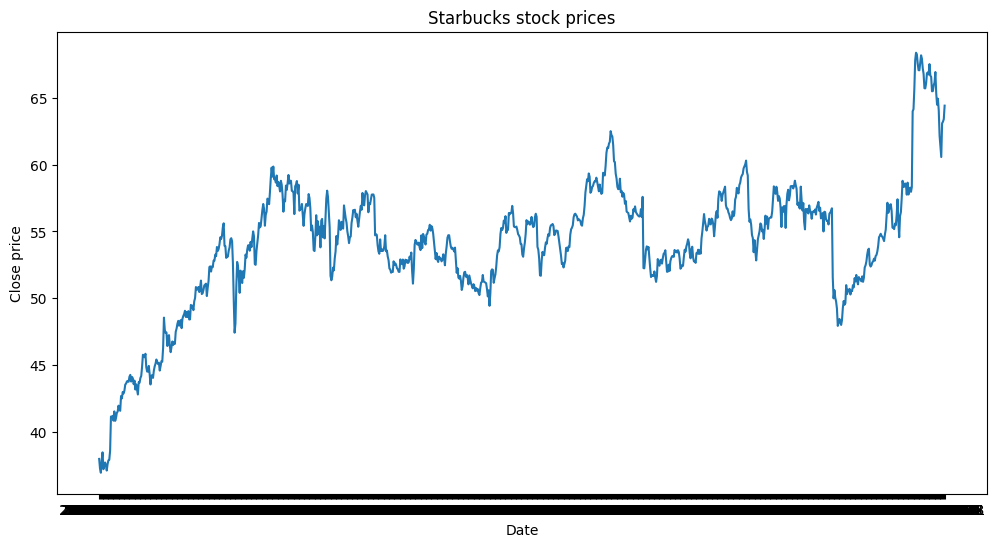

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.plot(df['Date'], df['Close'])
plt.title("Starbucks stock prices")
plt.xlabel("Date")

plt.ylabel("Close price")
plt.show()

In [ ]:
series = df["Close"]
df_ma = df[["Close"]].copy()

Moving Averages

In [ ]:
df_ma = series.to_frame (name="Close")

df_ma['SMA_7'] = df_ma["Close"].rolling(window=7).mean()
df_ma["SMA_30"] = df_ma["Close"].rolling(window=30).mean()
df_ma["SMA_90"] = df_ma["Close"].rolling(window=90).mean()

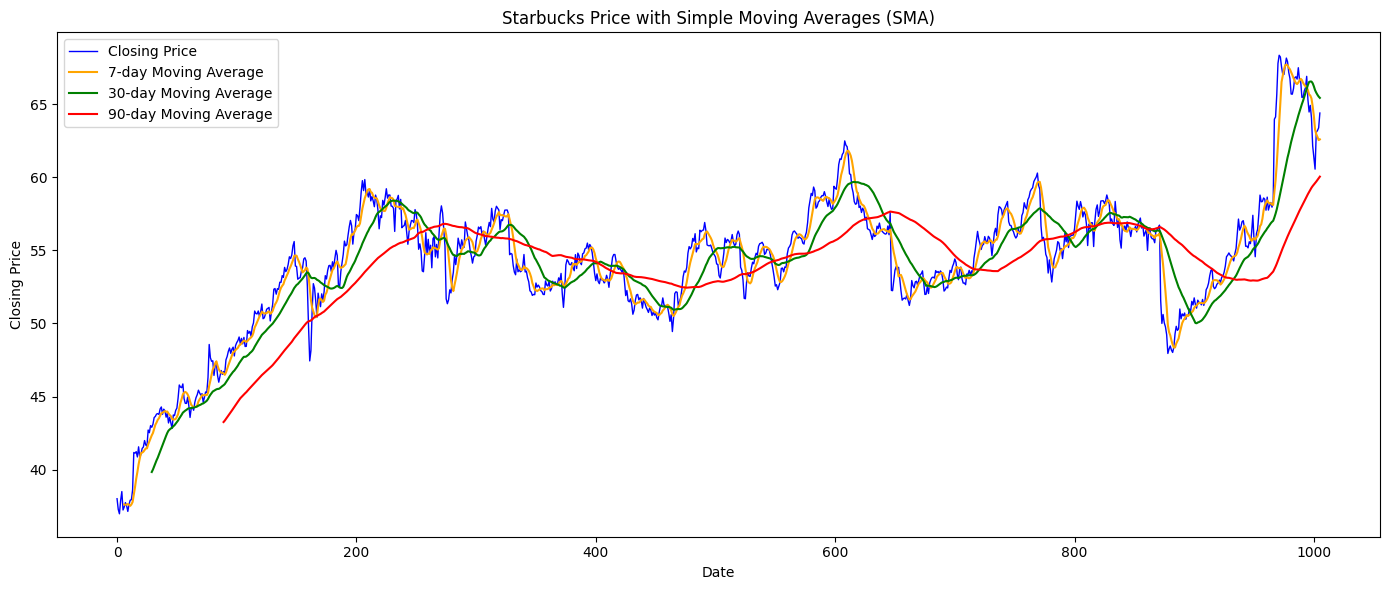

In [ ]:
plt.figure(figsize=(14, 6))

plt.plot(df_ma.index, df_ma['Close'], label='Closing Price', color='blue', linewidth=1)
plt.plot(df_ma.index, df_ma['SMA_7'], label='7-day Moving Average', color='orange')
plt.plot(df_ma.index, df_ma['SMA_30'], label='30-day Moving Average', color='green')
plt.plot(df_ma.index, df_ma['SMA_90'], label='90-day Moving Average', color='red')

plt.title('Starbucks Price with Simple Moving Averages (SMA)')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.grid(False)
plt.tight_layout()
plt.show()


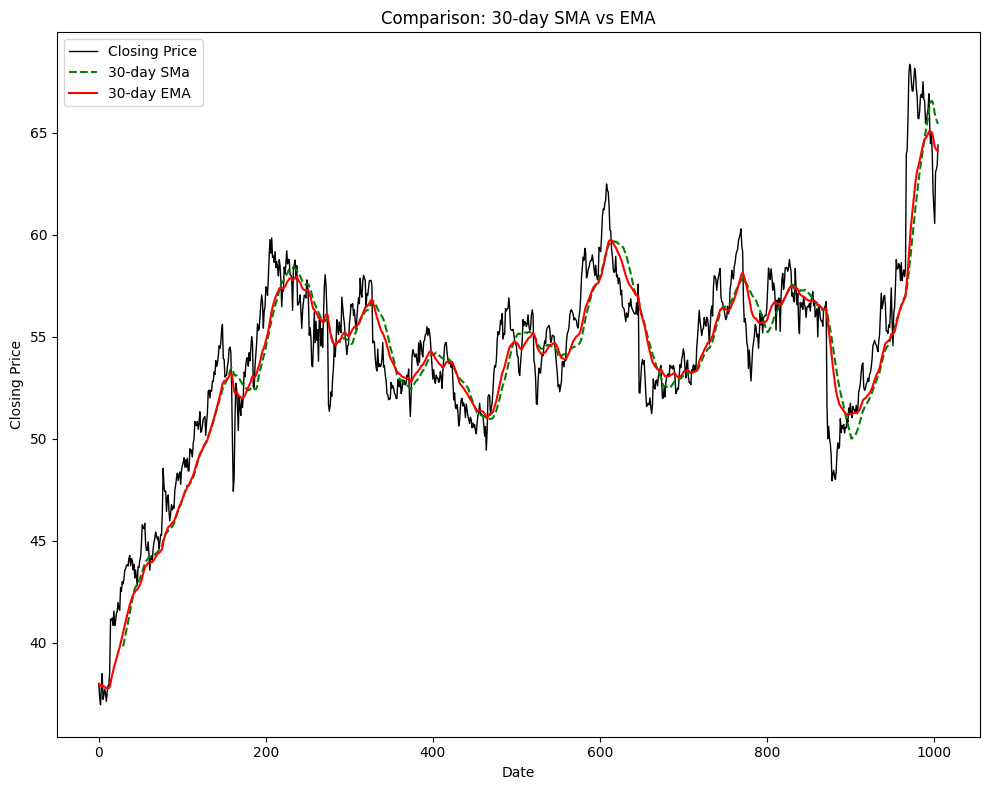

In [ ]:
# EMA

df_ma["EMA_7"] = df_ma["Close"].ewm(span=7, adjust=False).mean()
df_ma["EMA_30"] = df_ma["Close"].ewm(span=30, adjust=False).mean()
df_ma["EMA_90"] = df_ma["Close"].ewm(span=90, adjust=False).mean()

plt.figure(figsize=(10,8))

# Actual price
plt.plot(df_ma.index, df_ma['Close'], label='Closing Price', color='black', linewidth=1)

#SMA
plt.plot(df_ma.index, df_ma["SMA_30"], label='30-day SMa', color = "green", linestyle='--')

# EMS
plt.plot(df_ma.index, df_ma['EMA_30'], label='30-day EMA', color='red', linestyle='-')

plt.title('Comparison: 30-day SMA vs EMA')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.grid(False)
plt.tight_layout()
plt.show()


In [ ]:
df["SMA_30"] = df["Close"].rolling(window=30).mean()
df.dropna(inplace=True)


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df[["Close", "SMA_30"]])
# #예: LSTM, SVM, KNN 등 거리 기반 또는 gradient 기반 모델은 입력 스케일에 민감함.

# 비슷한 범위라도 약간의 차이로 인해 학습에 불균형이 생길 수 있음.

# 정규화를 통해 Close, SMA_30의 영향력을 동일하게 만들어줌.

In [ ]:
def create_sequences_multivariate(data, n_steps):
  X, y = [], []
  for i in range(n_steps, len(data)):
    X.append(data[i-n_steps:i]) # 둘의 차가 n_steps 잖아
    y.append(data[i, 0])
  return np.array(X), np.array(y)


In [ ]:
n_steps = 90

X, y = create_sequences_multivariate(scaled_data, n_steps)

split = int(len(X) * 0.8)

X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]


In [ ]:
print(X)

[[[0.00293338 0.        ]
  [0.01118913 0.00636057]
  [0.02898131 0.01419599]
  ...
  [0.30786373 0.32620513]
  [0.3067593  0.33103484]
  [0.31467433 0.33644487]]

 [[0.01118913 0.00636057]
  [0.02898131 0.01419599]
  [0.03210267 0.02250919]
  ...
  [0.3067593  0.33103484]
  [0.31467433 0.33644487]
  [0.29976854 0.34113399]]

 [[0.02898131 0.01419599]
  [0.03210267 0.02250919]
  [0.03833757 0.0298858 ]
  ...
  [0.31467433 0.33644487]
  [0.29976854 0.34113399]
  [0.3130177  0.34638584]]

 ...

 [[0.40944712 0.42093562]
  [0.42347173 0.42635163]
  [0.42658526 0.43122612]
  ...
  [0.72730157 0.98753907]
  [0.69479551 0.97781777]
  [0.79348861 0.97138884]]

 [[0.42347173 0.42635163]
  [0.42658526 0.43122612]
  [0.38061856 0.43498154]
  ...
  [0.69479551 0.97781777]
  [0.79348861 0.97138884]
  [0.79818828 0.96596571]]

 [[0.42658526 0.43122612]
  [0.38061856 0.43498154]
  [0.37438757 0.4384029 ]
  ...
  [0.79348861 0.97138884]
  [0.79818828 0.96596571]
  [0.80562942 0.96140008]]]


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

from tensorflow.keras.models import Sequential # tensorflow 버전 낮추기

from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

plt.style.use("ggplot")

AttributeError: module 'numpy' has no attribute 'dtypes'

In [ ]:
# !pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 71.4 MB/s eta 0:00:00


In [ ]:
# !pip uninstall numpy
# !pip install numpy --upgrade --force-reinstall

Found existing installation: numpy 2.2.6
Uninstalling numpy-2.2.6:
  Would remove:
    /usr/local/bin/f2py
    /usr/local/bin/numpy-config
    /usr/local/lib/python3.11/dist-packages/numpy-2.2.6.dist-info/*
    /usr/local/lib/python3.11/dist-packages/numpy.libs/libgfortran-040039e1-0352e75f.so.5.0.0
    /usr/local/lib/python3.11/dist-packages/numpy.libs/libquadmath-96973f99-934c22de.so.0.0.0
    /usr/local/lib/python3.11/dist-packages/numpy.libs/libscipy_openblas64_-56d6093b.so
    /usr/local/lib/python3.11/dist-packages/numpy/*
Proceed (Y/n)? ㅛ
Your response ('ㅛ') was not one of the expected responses: y, n, 
Proceed (Y/n)? y
  Successfully uninstalled numpy-2.2.6
  Using cached numpy-2.2.6-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)
Using cached numpy-2.2.6-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (16.8 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the 

In [ ]:
# ! pip install numpy==1.26.4


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 60.5 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.2.6
    Uninstalling numpy-2.2.6:
      Successfully uninstalled numpy-2.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.


In [ ]:
from pmdarima import auto_arima

stepwise_midel = auto_arima(series,
                            seasonal = True,
                            m = 5,
                            start_p =0,
                            start_q=0,
                            max_p=3,
                            max_q=3,
                            start_P=0,
                            start_Q=0,
                            max_P=2,
                            max_Q=2,
                            d=1,
                            D=1,
                            trace = True,
                            error_action='ignore',
                            suppress_warnings=True,
                            stepwise=True

                            )

ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

In [ ]:
import numpy
print(numpy.__version__)

2.0.2


In [ ]:
!pip install numpy==1.26.4 -- force-reinstall

ERROR: Could not find a version that satisfies the requirement force-reinstall (from versions: none)
ERROR: No matching distribution found for force-reinstall


In [ ]:
from statsmodels.tsa.statespace.sarimax import SAPIMA

sarima_model SARIMAX(series,
                     order=stepwise_model,seasonal_order,
                     enforce_stationarity=False,
                     enfoorce-invertibility=False)

sarima_result = sarima_model.fit()


In [ ]:
# 정상성과 비정상성 블로그 참고. 북마크


In [ ]:
print(sarima_result.summary())

SRARIMA model forecast

In [ ]:
forecast_steps = 30

sarima_forcast = sarima_result.get_forecast(stpes=forecast_steps) # steps=forecast_steps는 SARIMA 모델이 현재 시점 이후의 미래 데이터를 몇 개 생성할지를 의미합니다.
# 불확실성(오차) 도 커집니다.
forecast_mean = sarima_forecast.predicted_mean # 각 미래 시점에 대해 SARIMA 모델이 가장 유력하다고 판단한 예측값
conf_int = sarima_forecast.conf_int() # 예측값의 불확실성
https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FbbSmXr%2FbtskcmIVJnr%2F3fnZazqu6zBIuElgyKxCqk%2Fimg.png

In [ ]:
# Future dates
last_date = series.index[-1]
forecast_index = pd.date_range(last_date+pd.Timedalta(days=1), periods=forecast_steps)
forecast_index



In [ ]:
# Plot

C:\Users\USER\Downloads\sarima_forecast_next30.png
plt.figure(figsize=(14,6))
plt.plot(series.index, series, label='Historical Data', color='blue')
plt.plot(forecast_index, forecast_mean, label='COnfidence Interval')

plt.

In [ ]:
# create DAtframe with
df_forecast =pd.DAtaframw({
    'DAte':forecast_index2,
    'Forecast':forecast_values2,
    })

AttributeError: module 'pandas' has no attribute 'DAtaframw'

In [ ]:
“매 기준(지표)을 다르게 설정한 것에 대한 평가를 해서 인간이 비교하기 쉽게 하는 것”

In [ ]:
버전 문제 매일 10분만 투자해서 해결해보기
